In [8]:
import otter
grader = otter.Notebook()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# DSCI 311 Fall 25 Midterm
## Due Date: Thursday 10/30 by 11:59 PM PST

**Collaboration Policy: No collaboration is allowed on this test. All work must be your own.**

**AI Policy**: You may use AI (and other internet resources) to *help* you answer questions. You may not copy any code wholesale from AI output. Consider AI as an informative assistant, *not* as a replacement for you (on this exam and in life). If I suspect purely AI-generated code, I'll ask you about it and expect you to explain clearly why you coded things in that way.

- An appropriate AI query: "I need to make this dataset longer but can't figure out the argument for turning columns into values. Can you help me understand the function?"

- An invalid AI query: "Give me code to make these data longer."

**Note that for ALL plotting questions, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

This midterm may cover any topics through the first 4 weeks of class. You may be expected to do things that we have not explicitly shown in class or in an assignment - this is intentional, and why we expect you to reference function documentation (*e.g.* `help(pd.read_csv)`) or internet resources for help. But most of what you will do will have been shown either in lecture (in slides or in lecture notebooks) or in assignments. 

There are three sections to the midterm:

**Section 1**: Candy 

**Section 2**: Horror movies

**Section 3**: Hauntings

**Grader Tests**: As in homeworks, these tests only check whether your answer *could* be correct, not whether it is correct. 

## Section 1

Here we'll be reading in two datasets describing halloween candy - `candy_qualities.csv`, which contains traits associated with various halloween candies, and `candy_rankings.csv` which contains ranked preferences for each candy and a few additional characteristics as surveyed in 2017 with 269,000 votes. Our objective is simple: **determine the ultimate halloween candies and their characteristics**. The first step in this process will be to combine our data.

`candy_qualities.csv`:
    
    `name` - the name of the candy
    `quality` - some quality that may or may not represent the candy
    `value` - whether or not candy has the associated quality 

    Note that the quality 'pluribus' means candy that comes in multiples (think Skittles)
    
`candy_rankings.csv`: 

    `competitorname` - the name of the candy
    `sugarpercent` - the percentile of sugar it falls under in the data set
    `pricepercent` - the unit price percentile compared to the rest of the data set
    `winpercent` - the overall win percentage based on 269,000 matchups. 

Read in `candy_qualities.csv` and `candy_rankings.csv`.

In [12]:
candy_quals = pd.read_csv("data/candy_qualities.csv")

In [13]:
candy_quals.head()

,name,quality,value
0,100 Grand,chocolate,1
1,3 Musketeers,chocolate,1
2,One dime,chocolate,0
3,One quarter,chocolate,0
4,Air Heads,chocolate,0


In [14]:
candy_rankings = pd.read_csv("data/candy_rankings.csv")

In [15]:
candy_rankings.head()

,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,0.732,0.860,66.971725
1,3 Musketeers,0.604,0.511,67.602936
2,One dime,0.011,0.116,32.261086
3,One quarter,0.011,0.511,46.116505
4,Air Heads,0.906,0.511,52.341465


#### Question 1

Our goal is to merge our two datasets together without duplicating any records. We therefore need to first format our datasets similarily. Pivot `candy_quals` so that there is only a **single record** (row) per candy. In other words, the granularity of the data should be at the level of candy name.

In [16]:
candy_wide = candy_quals.pivot(index='name', columns='quality', values='value').reset_index()
candy_wide

quality,name,bar,caramel,chocolate,crispedricewafer,fruity,hard,nougat,peanutyalmondy,pluribus
0,100 Grand,1,1,1,1,0,0,0,0,0
1,3 Musketeers,1,0,1,0,0,0,1,0,0
2,Air Heads,0,0,0,0,1,0,0,0,0
3,Almond Joy,1,0,1,0,0,0,0,1,0
4,Baby Ruth,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,0,0,0,1,0,0,0,0
81,Warheads,0,0,0,0,1,1,0,0,0
82,WelchÕs Fruit Snacks,0,0,0,0,1,0,0,0,1
83,WertherÕs Original Caramel,0,1,0,0,0,1,0,0,0


In [17]:
grader.check("q1_1")

q1_1 results: All test cases passed!

#### Question 2

To combine our two datasets, we need to canonicalize their keys. Identify all of the candy names in `candy_wide` that aren't matches in `candy_rankings`, returned as a Series or a numpy array.

In [33]:
mismatches = candy_wide[~candy_wide['name'].isin(candy_rankings['competitorname'])]['name']
mismatches = np.array(mismatches)
mismatches

array(['HersheyÕs Kisses', 'HersheyÕs Krackel',
       'HersheyÕs Milk Chocolate', 'HersheyÕs Special Dark', 'M&MÕs',
       'Peanut butter M&MÕs', 'ReeseÕs Miniatures',
       'ReeseÕs Peanut Butter cup', 'ReeseÕs pieces',
       'ReeseÕs stuffed with pieces', 'WelchÕs Fruit Snacks',
       'WertherÕs Original Caramel'], dtype=object)

In [34]:
grader.check("q1_2")

q1_2 results: All test cases passed!

#### Question 3

Fix the issues in the key of `candy_wide` so that we can successfully merge our data (*i.e.* make these non-matching values match their counterparts in `candy_rankings`). 

In [35]:
candy_wide["name"] = candy_wide["name"].str.replace("'", "'")

In [142]:
grader.check("q1_3")

q1_3 results: All test cases passed!

#### Question 4

Finally, merge the two Dataframes such that no information is lost in either frame. 

In [143]:
candy = pd.merge(candy_wide, candy_rankings, left_on='name', right_on='competitorname', how='left')
candy.head()

,name,bar,caramel,chocolate,crispedricewafer,fruity,hard,nougat,peanutyalmondy,pluribus,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,1,1,1,1,0,0,0,0,0,100 Grand,0.732,0.860,66.971725
1,3 Musketeers,1,0,1,0,0,0,1,0,0,3 Musketeers,0.604,0.511,67.602936
2,Air Heads,0,0,0,0,1,0,0,0,0,Air Heads,0.906,0.511,52.341465
3,Almond Joy,1,0,1,0,0,0,0,1,0,Almond Joy,0.465,0.767,50.347546
4,Baby Ruth,1,1,1,0,0,0,1,1,0,Baby Ruth,0.604,0.767,56.914547


In [144]:
grader.check("q1_4")

q1_4 results: All test cases passed!

#### Question 5

Plot the associations with regression lines between sugar % and win %, and price % and win %. Plot both associations on the same figure and ensure that each has a different color. Include a legend labeling each color. 

You can use any method you want for the regression lines, either estimating them manually or using seaborn's plotting functions. 

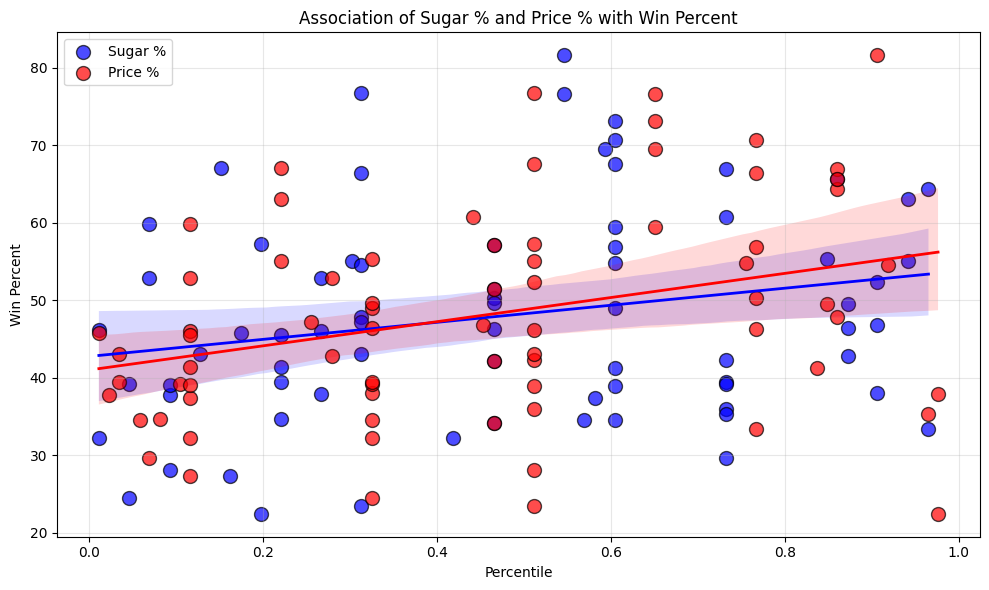

In [145]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x='sugarpercent', 
    y='winpercent', 
    data=candy,
    scatter_kws={'s': 100, 'alpha': 0.7, 'color': 'blue', 'edgecolors': 'black'},
    line_kws={'color': 'blue', 'linewidth': 2},
    label='Sugar %'
)

sns.regplot(
    x='pricepercent', 
    y='winpercent', 
    data=candy,
    scatter_kws={'s': 100, 'alpha': 0.7, 'color': 'red', 'edgecolors': 'black'},
    line_kws={'color': 'red', 'linewidth': 2},
    label='Price %'
)

plt.xlabel('Percentile')
plt.ylabel('Win Percent')
plt.title('Association of Sugar % and Price % with Win Percent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Question 6

What can we infer about more popular candy from the above plot?

**Your response**: More popular candies have higher sugar content and higher prices.


#### Question 7

Create a **horizontal** barplot representing the sums of each candy quality. Ensure the barplot is sorted from most to least.  

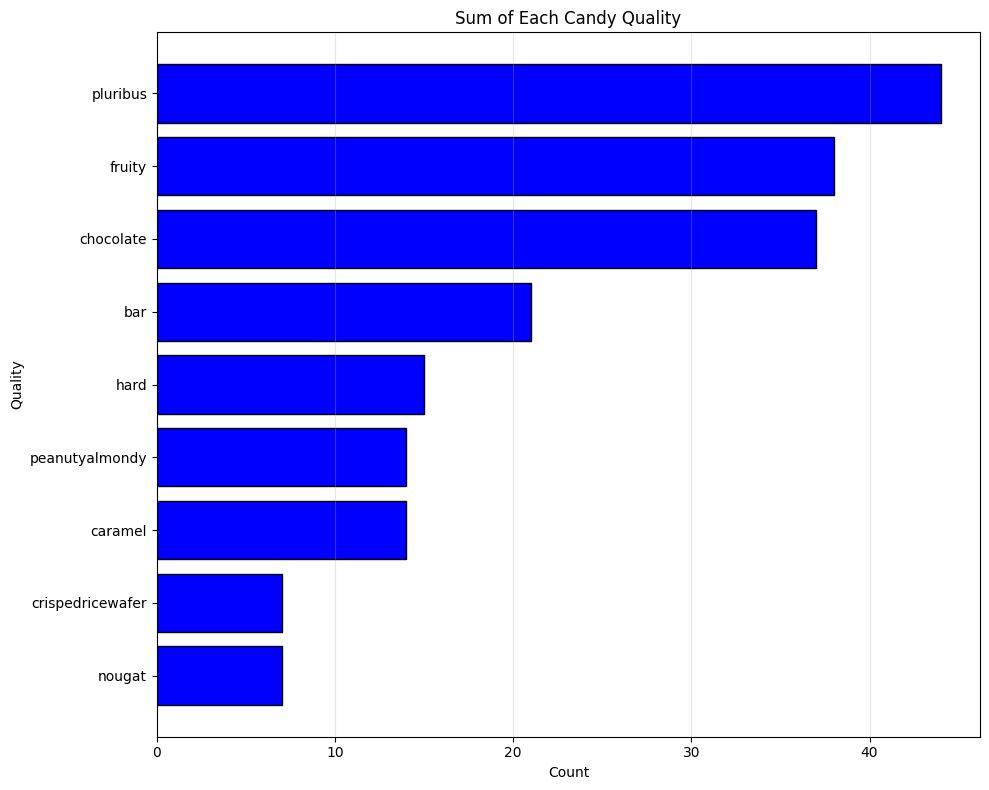

In [146]:
quality_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
quality_sums = candy[quality_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(quality_sums.index, quality_sums.values, color='blue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Quality')
plt.title('Sum of Each Candy Quality')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### Question 8

Now split the data into two subsets: the 50% of candy above the median of win percent and the 50% of candy below the median. Then plot a **paired**, horizontal barplot representing the same counts of each quality as above, where black bars represent the less popular candy and orange bars represent the more popular candy. 

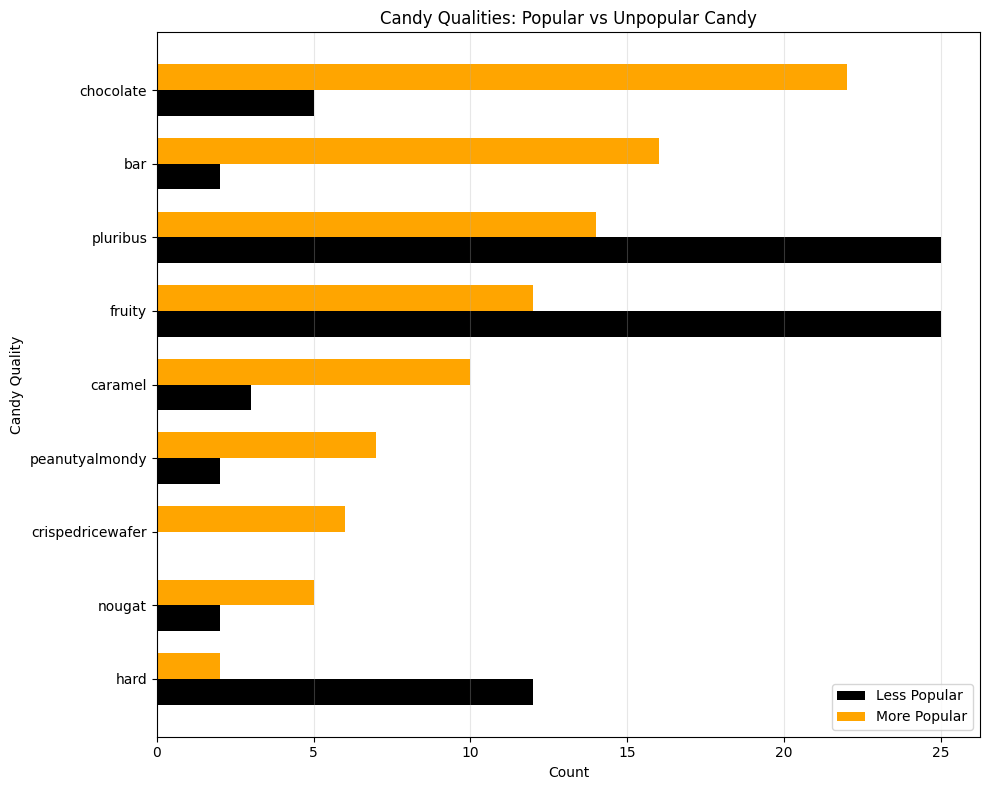

In [147]:
plt.figure(figsize=(10, 8))

plt.barh(y_pos - width/2, unpopular_sums.values, width, label='Less Popular', color='black')
plt.barh(y_pos + width/2, popular_sums.values, width, label='More Popular', color='orange')

plt.yticks(y_pos, unpopular_sums.index)
plt.xlabel('Count')
plt.ylabel('Candy Quality')
plt.title('Candy Qualities: Popular vs Unpopular Candy')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

#### Question 9

Characterize the most popular and the least popular halloween candy, giving extra emphasis to how they differ.

**Your response**: Popular candies: chocolate bars with caramel or nuts. 
Unpopular: fruity or hard candies.


## Section 2

Read in the `IMDB Horror Movies` dataset. This dataset represents a subset of some of the best-know movies in the horror genre released between 1920 and 2023.  

In [148]:
horror = pd.read_csv("data/Horror Movies IMDB.csv")
horror.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN


#### Question 1

`Gross` represents the total amount each movie grossed in theatres in millions.

What type of variable does `Gross` represent? Based on your answer, what issues are there in the current formatting of the variable? 

**Your response**: Gross is a numeric variable showing total box office revenue in millions. The issues are that it is stored as text, which includes dollar signs and letter suffixes, and has missing values.

#### Question 2

Clean a variable `Gross_clean` such that it is now the type of variable you identified above and can be used for analyses. We don't want to look at movies that didn't make any money, so also filter the data for values of `Gross_clean` greater than 0. 

In [149]:
horror['Gross_clean'] = (horror['Gross'].str.replace('$', '', regex=False).str.replace('M', '', regex=False).astype(float))

horror = horror[horror['Gross_clean'] > 0].copy()

print(f"Rows remaining: {len(horror)}")
print(f"Gross_clean type: {horror['Gross_clean'].dtype}")
horror[['Gross', 'Gross_clean']].head()

Rows remaining: 633
Gross_clean type: float64


,Gross,Gross_clean
0,$78.90M,78.90
1,$32.00M,32.00
2,$44.02M,44.02
3,$13.78M,13.78
5,$232.91M,232.91


In [150]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 3

First create a subset of the data filtering out NA values in `Gross_clean`. 

Then visualize the distributions of `Gross_clean` and `Rating`. Apply any tansformations to the data (if necessary) to make both variables approximately normally distributed. It's fine if there is still some tail to the distribution.

In [151]:
horror_clean = horror.dropna(subset=['Gross_clean', 'Rating']).copy()
print(f"Rows after dropping NAs: {len(horror_clean)}")

Rows after dropping NAs: 633


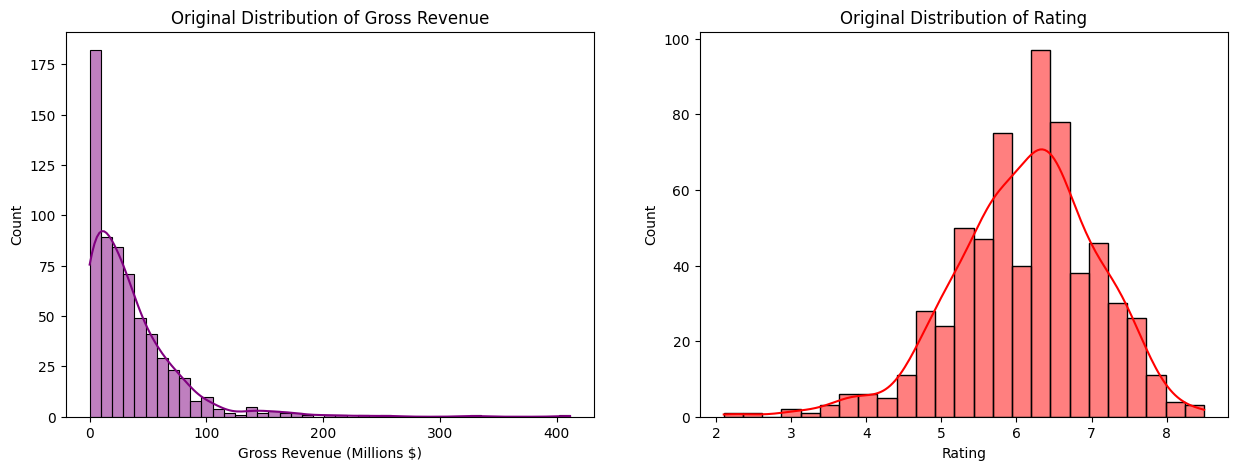

In [152]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=horror_clean, x=horror_clean['Gross_clean'], kde=True, color='purple')
plt.xlabel('Gross Revenue (Millions $)')
plt.title('Original Distribution of Gross Revenue')


plt.subplot(1, 2, 2)
sns.histplot(data=horror_clean, x=horror_clean['Rating'], kde=True, color='red')
plt.xlabel('Rating')
plt.title('Original Distribution of Rating')

plt.show()


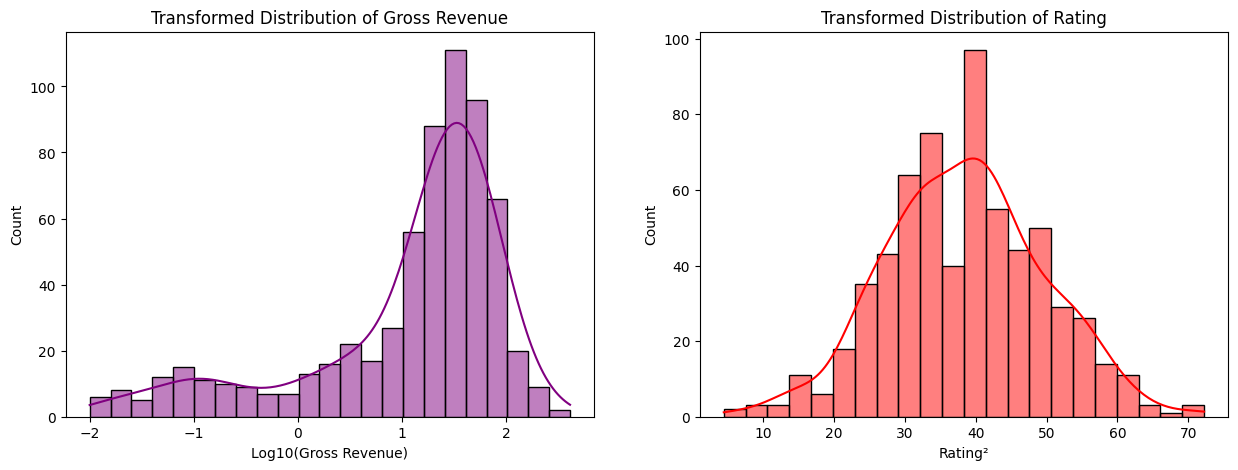

In [153]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=horror_clean, x=np.log10(horror_clean['Gross_clean']), kde=True, color='purple')
plt.xlabel('Log10(Gross Revenue)')
plt.title('Transformed Distribution of Gross Revenue')

plt.subplot(1, 2, 2)
sns.histplot(data=horror_clean, x=horror_clean['Rating']**2, kde=True, color='red')
plt.xlabel('Rating²')
plt.title('Transformed Distribution of Rating')

plt.show()


#### Question 4

One of the presumed characteristics of "oscar bait" i.e. films gunning for awards is a long runtime. Is there any evidence for this among horror movies? Evaluate this visually with a regression plot for each of the transformed and untransformed rating. 

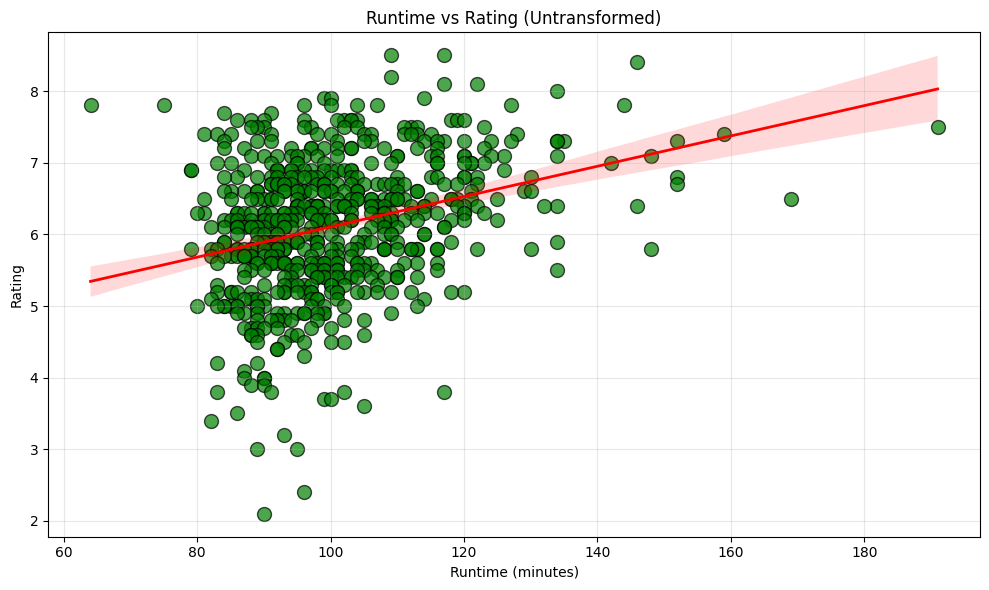

In [154]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x='Runtime',
    y='Rating',
    data=horror_clean,
    scatter_kws={'s': 100, 'alpha': 0.7, 'color': 'green', 'edgecolors': 'black'},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.title('Runtime vs Rating (Untransformed)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

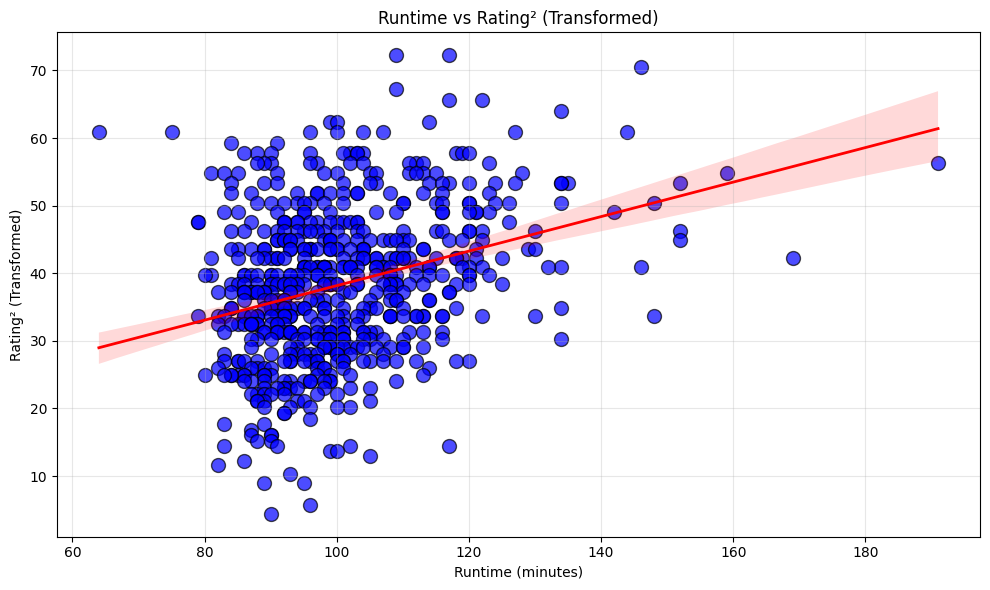

In [155]:
plt.figure(figsize=(10, 6))

sns.regplot(
    x='Runtime',
    y=horror_clean['Rating']**2,
    data=horror_clean,
    scatter_kws={'s': 100, 'alpha': 0.7, 'color': 'blue', 'edgecolors': 'black'},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating² (Transformed)')
plt.title('Runtime vs Rating² (Transformed)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Question 5

What do you conclude from the above visualization? Describe the association, and whether you think a simple linear model is an effective description of the relationship.

**Your response**: Both plots show a positive relationship between runtime and rating: As runtime increases, ratings also increase slightly. the relationship is weak with noticeable variability. The transformation (Rating²) makes the trend slightly clearer and reduces some spread, but the overall pattern remains similar. This is a simple linear model providing a simple visualization of the relationship.


#### Question 6

Who are the 5 most highly rated directors (on average) **among directors with at least 3 movies in the data**? Return your answer as a Series or numpy array.

In [156]:
best_directors = director_stats[director_stats['num_movies'] >= 3].nlargest(5, 'avg_rating')['Director'].tolist()
print("Top 5 Directors:", best_directors)


Top 5 Directors: ['Jordan Peele', 'David Cronenberg', 'Sam Raimi', 'Robert Rodriguez', 'James Wan']


In [157]:
grader.check("q2_6")

q2_6 results: All test cases passed!

#### Question 8

Create three new columns in `horror` called `Primary Genre`, `Secondary Genre` and `Tertiary Genre`. These columns should be populated by the values in Genre in the order they appear. For example, the movie Alien should have "Horror" as its primary genre, "Sci-Fi" as its secondary genre, and "None" as its tertiary genre.

*Hint* You may want to review your string methods here.

In [158]:
horror['Genre_split'] = horror['Genre'].str.split(', ')
horror['Primary Genre'] = horror['Genre_split'].str[0]
horror['Secondary Genre'] = horror['Genre_split'].str[1].fillna('None')
horror['Tertiary Genre'] = horror['Genre_split'].str[2].fillna('None')


horror[['Genre', 'Primary Genre', 'Secondary Genre', 'Tertiary Genre']].head()

,Genre,Primary Genre,Secondary Genre,Tertiary Genre
0,"Horror, Sci-Fi",Horror,Sci-Fi,None
1,"Horror, Mystery, Thriller",Horror,Mystery,Thriller
2,"Drama, Horror",Drama,Horror,None
3,"Horror, Mystery, Sci-Fi",Horror,Mystery,Sci-Fi
5,Horror,Horror,None,None


In [159]:
grader.check("q2_8")

q2_8 results: All test cases passed!

#### Question 9

All of the movies in the dataset are horror movies, so the inclusion of Horror as a genre isn't helpful. Create a new column called `Genre_clean` that represents either the primary genre of the movie, or the secondary genre if the primary genre of the movie is "Horror". There should therefore be no value of "Horror" in `Genre_clean`. 

For example, `Genre_clean` for Alien should be 'Sci-Fi', 'Mystery' for Psycho, and 'Drama' for The Shining.

In [160]:
horror['Genre_clean'] = horror.apply(
    lambda row: row['Secondary Genre'] if row['Primary Genre'] == 'Horror' 
                else row['Primary Genre'], 
    axis=1
)

horror[['Genre', 'Primary Genre', 'Secondary Genre', 'Genre_clean']].head(10)

,Genre,Primary Genre,Secondary Genre,Genre_clean
0,"Horror, Sci-Fi",Horror,Sci-Fi,Sci-Fi
1,"Horror, Mystery, Thriller",Horror,Mystery,Mystery
2,"Drama, Horror",Drama,Horror,Drama
3,"Horror, Mystery, Sci-Fi",Horror,Mystery,Mystery
5,Horror,Horror,None,None
6,"Crime, Drama, Horror",Crime,Drama,Crime
8,"Drama, Horror, Thriller",Drama,Horror,Drama
11,"Comedy, Horror",Comedy,Horror,Comedy
13,"Drama, Fantasy, Horror",Drama,Fantasy,Drama
14,"Adventure, Horror, Sci-Fi",Adventure,Horror,Adventure


In [161]:
grader.check("q2_9")

q2_9 results: All test cases passed!

#### Question 10

Have horror movies gotten better or worse through time? Visually evaluate this with a paired boxplot of ratings for the 3 most popular genres (genres with the highest incidence in the data) before and after the year 2000 (inclusive in either direction). 

Top 3 genres: ['Action', 'Mystery', 'Drama']


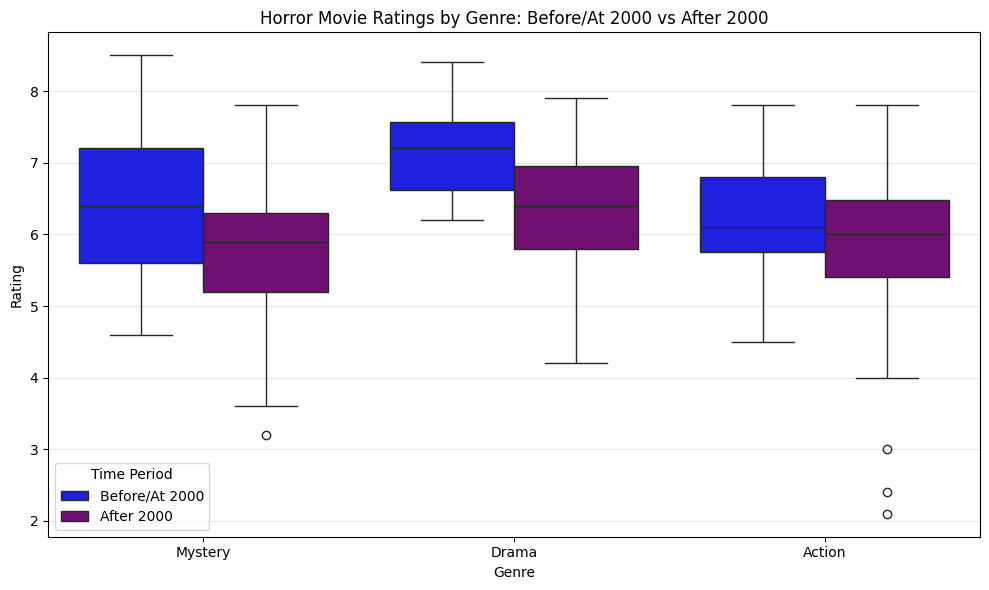

In [162]:
top_genres = horror['Genre_clean'].value_counts().head(3).index.tolist()
print("Top 3 genres:", top_genres)

horror_top = horror[horror['Genre_clean'].isin(top_genres)].copy()
horror_top['Period'] = (horror_top['Movie Year'] > 2000).map({False: 'Before/At 2000', True: 'After 2000'})

# Boxplot
plt.figure(figsize=(10, 6))

sns.boxplot(x='Genre_clean', y='Rating', hue='Period', data=horror_top,
            palette=['blue', 'purple'])

plt.ylabel('Rating')
plt.xlabel('Genre')
plt.title('Horror Movie Ratings by Genre: Before/At 2000 vs After 2000')
plt.legend(title='Time Period')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Section 3

Read in the `haunted_places` dataset. This is a dataset of all known haunting in the U.S. and associated descriptions. Each record is associated with one haunting. 

In [163]:
hauntings = pd.read_csv("data/haunted_places.csv")
hauntings.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097


#### Question 1

Read in the `state_populations` file and use it (with `haunted_places`) to determine which state has the most hauntings *per capita* in the United States (hauntings per individual). Return your answer as a string. 

In [164]:
pop = pd.read_csv("data/state_populations.csv")

In [165]:
haunting_counts = hauntings.groupby('state').size().reset_index(name='haunting_count')
haunted_pop = pd.merge(haunting_counts, pop, on='state', how='inner')
haunted_pop['per_capita'] = haunted_pop['haunting_count'] / haunted_pop['population']

most_haunted = haunted_pop.loc[haunted_pop['per_capita'].idxmax(), 'state']
most_haunted

'Wyoming'

In [166]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 2

The ratios of females to males in the U.S. is roughly 49/51 (or about 0.96). One would presume that hauntings reflect a similar sex ratio. 

What ratio of hauntings involve a girl versus a boy ($\frac{girl}{boy}$) and what ratio involve a woman versus a man ($\frac{woman}{man}$)?

In [167]:
descriptions = hauntings['description'].str.lower()

girl_count = descriptions.str.contains('girl', na=False).sum()
boy_count = descriptions.str.contains('boy', na=False).sum()
woman_count = descriptions.str.contains('woman', na=False).sum()
man_count = descriptions.str.contains('man', na=False).sum()


In [168]:
girl_boy_ratio = girl_count / boy_count if boy_count > 0 else np.nan
girl_boy_ratio

1.8833967046894804

In [169]:
woman_man_ratio = woman_count / man_count if man_count > 0 else np.nan
woman_man_ratio

0.26831460674157304

In [170]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Is the ratio similar or different between the two subsets? What can we infer about how age affects the likelihood of different sexes lingering after death?

**Your response**:  The ratios are different, the hauntings mention girls much more often than boys, but men more often than women, which we can infer that younger females and older males are more commonly described as ghosts.


#### Question 3

Create a horizontal barplot of the 20 most common locations in the haunting descriptions. Be sure to lowercase all of the words. The resulting barchart should *only* include general location names (e.g. hospital, cemetary, house), not proper nouns (e.g. the specific name of a hospital), articles (e.g "the", "an", "is" etc...) or adjectives. Multiple words for the same thing is ok (e.g. street and road).

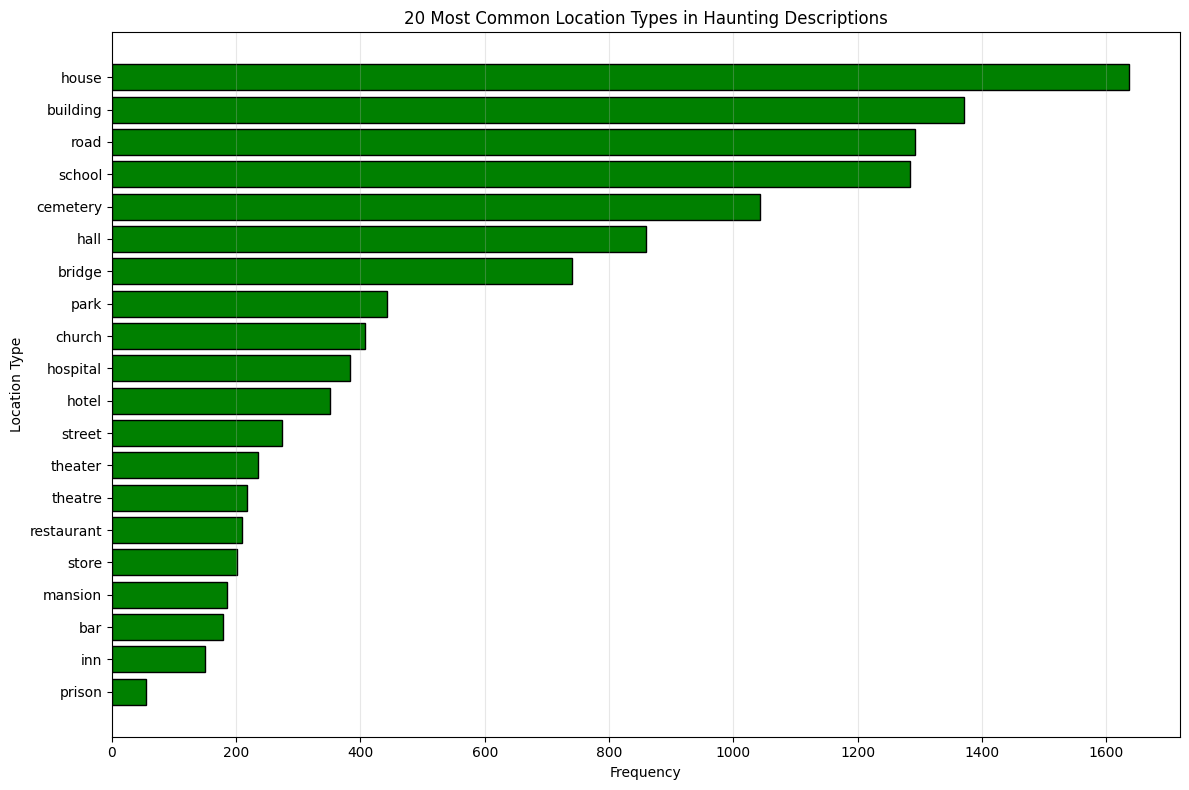

In [171]:
stop_words = {...}  # keep your existing stop_words set
location_words = ['house','building','cemetery','road','street','hotel','school','hospital','church',
                  'bridge','theater','theatre','prison','jail','restaurant','bar','store','park',
                  'hall','mansion','castle','lighthouse','inn','tavern']

words = ' '.join(hauntings['description'].dropna().str.lower()).split()
word_counts = pd.Series(words).value_counts()

top_locations = word_counts[[w for w in word_counts.index if w in location_words]].head(20)

plt.figure(figsize=(12,8))

plt.barh(top_locations.index, top_locations.values, color='green', edgecolor='black')

plt.xlabel('Frequency')
plt.ylabel('Location Type')
plt.title('20 Most Common Location Types in Haunting Descriptions')
plt.gca().invert_yaxis(); plt.grid(axis='x', alpha=0.3); plt.tight_layout()
plt.show()


Why do you suppose some of these places are more haunted than others?

**Your response**: Places like houses and cemeteries seem more haunted because they are old, familiar, and often connected to strong emotions, family secrets, scandals and past events.

#### Question 4

In your opinion, what is the scariest haunting in Eugene?

In [172]:
eugene_hauntings = hauntings[hauntings['city'].str.lower() == 'eugene'].copy()
eugene_hauntings[['location', 'description']]

,location,description
2206,Fox Hallow French Immersion School,February 2007 correction: Formerly listed as F...
2207,French Immersion School,"Reports of a weird presence, lights turn on an..."
2208,Kmart,Janitors working over night tell stories of do...
2209,Lane Community College,The elevator in the center building is haunted...
2210,Sheldon High school,In the courtyard there have been several sight...
2211,South Eugene High school,A Student was in the high school auditorium. H...
2212,Toys R Us,In the back room the upstairs is haunted by so...
2213,University of Oregon,Stafford Hall - Outside of room 101 of the Sta...
2214,Woodland Park,A young boy was shot on the playground. And wh...


**Your response**: Probably the Stafford hall because I lived in that unit of Earl during my freshman year. So scary to know I was their. 

# Submission

**That's a wrap!** I hope this exam didn't jump scare you.

Be sure to check that all of your tests pass the autograder.

In [173]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_2 results: All test cases passed!

q2_6 results: All test cases passed!

q2_8 results: All test cases passed!

q2_9 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

Make sure you have run all cells in your notebook in order. Then execute the following in the File menu

* Save and Checkpoint
* Close and Halt

Then upload your notebook to Canvas Assignment Midterm.